# **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# **1. Load Data**

In [3]:
train_df=pd.read_csv('train_aWnotuB.csv')
test_df=pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv')

**Preview train data**

In [6]:
print("Train Data:")
train_df.head()


Train Data:


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [8]:
print("Train Data:")
train_df.shape

Train Data:


(48120, 4)

In [9]:
print("Train Data:")
train_df.info()

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
print("Train Data:")
train_df.describe()

Train Data:


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


**Data Cleaning**

In [10]:
train_df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [12]:
print(f"\nTrain duplicate rows: {train_df.duplicated().sum()}")


Train duplicate rows: 0


# **2) Feature Engineering**

In [16]:
def feature_engineering(df):
    # Convert DateTime column to datetime type
    df['DateTime'] = pd.to_datetime(df['DateTime'])

    # Extract time-based features
    df['Hour'] = df['DateTime'].dt.hour
    df['Day'] = df['DateTime'].dt.day
    df['Weekday'] = df['DateTime'].dt.weekday  # Monday=0, Sunday=6
    df['Month'] = df['DateTime'].dt.month
    df['Year'] = df['DateTime'].dt.year
    df['Weekday_Name'] = df['DateTime'].dt.day_name()  # For EDA

    # Create binary flags:
    df['Is_Weekend'] = df['Weekday'].isin([5, 6]).astype(int)
    df['Is_Night'] = df['Hour'].isin(range(0, 6)).astype(int)

    # You can add additional features, like:
    # Sine/cosine transformation for cyclic features (Hour, Month)
    # Hour_sin and Hour_cos map hours into a circle (clock).
    # Now the model understands that Hour 23 and Hour 0 are close.
    # Same applies for Month, Weekday, or any other cyclical feature.
    df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
    df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

    return df

**Apply feature engineering to train and test data**

In [14]:
train_df = feature_engineering(train_df)
test_df  = feature_engineering(test_df)

**Check features**

In [15]:
print("\nEngineered Training Data:")
print(train_df.head())


Engineered Training Data:
             DateTime  Junction  Vehicles           ID  Hour  Day  Weekday  \
0 2015-11-01 00:00:00         1        15  20151101001     0    1        6   
1 2015-11-01 01:00:00         1        13  20151101011     1    1        6   
2 2015-11-01 02:00:00         1        10  20151101021     2    1        6   
3 2015-11-01 03:00:00         1         7  20151101031     3    1        6   
4 2015-11-01 04:00:00         1         9  20151101041     4    1        6   

   Month  Year Weekday_Name  Is_Weekend  Is_Night  Hour_sin  Hour_cos  \
0     11  2015       Sunday           1         1  0.000000  1.000000   
1     11  2015       Sunday           1         1  0.258819  0.965926   
2     11  2015       Sunday           1         1  0.500000  0.866025   
3     11  2015       Sunday           1         1  0.707107  0.707107   
4     11  2015       Sunday           1         1  0.866025  0.500000   

   Month_sin  Month_cos  
0       -0.5   0.866025  
1       -0.5 

# **3. Exploratory Data Analysis (EDA)**

In [17]:
sns.set(style="whitegrid")

 **Plot 1: Overall traffic trend (sampled for visualization)**

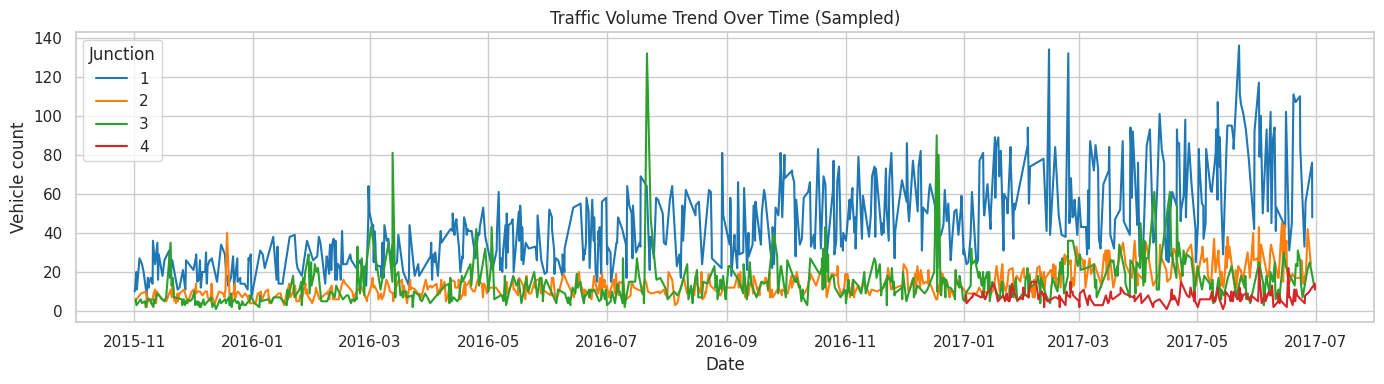

In [23]:
plt.figure(figsize=(14,4))
sampled=train_df.sample(min(2000, len(train_df)))
sns.lineplot(data=sampled, x='DateTime', y='Vehicles',hue='Junction', palette='tab10')
plt.title("Traffic Volume Trend Over Time (Sampled)")
plt.xlabel("Date")
plt.ylabel("Vehicle count")
plt.legend(title="Junction")
plt.tight_layout()
plt.show()


**Plot 2: Average hourly traffic per junction**

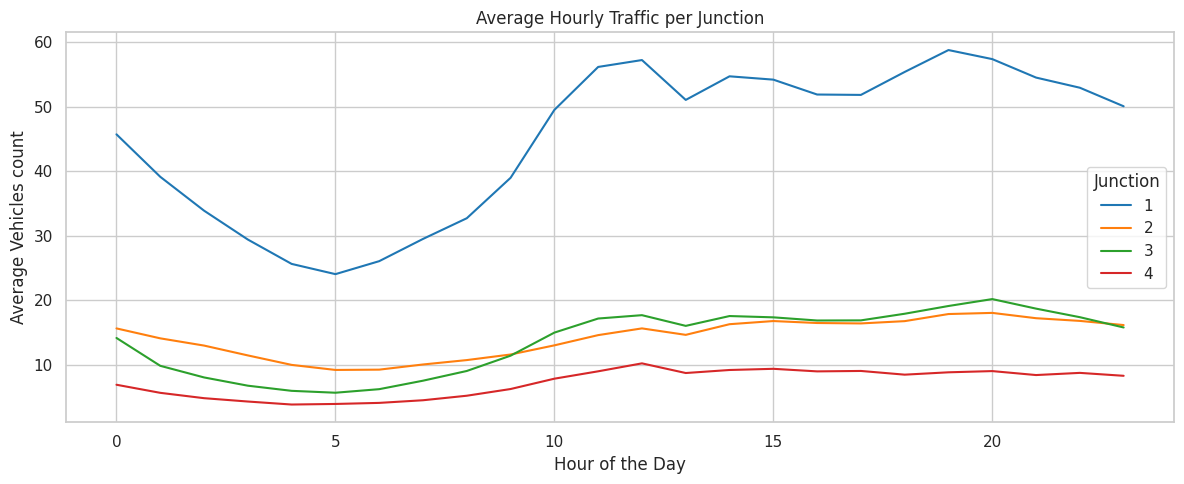

In [24]:
plt.figure(figsize=(12,5))
hourly_mean=train_df.groupby(['Hour','Junction'])['Vehicles'].mean().reset_index()
sns.lineplot(data=hourly_mean, x='Hour', y='Vehicles', hue='Junction', palette='tab10')
plt.title("Average Hourly Traffic per Junction")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Vehicles count")
plt.legend(title="Junction")
plt.tight_layout()
plt.show()

**Plot 3: Average traffic by weekday**

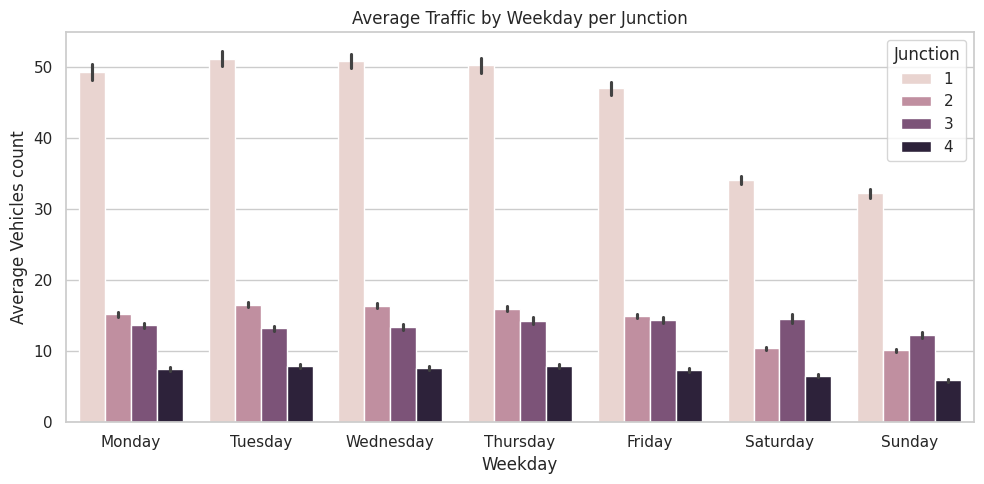

In [26]:
plt.figure(figsize=(10,5))
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data=train_df, x='Weekday_Name', y='Vehicles', hue='Junction', order=weekday_order)
plt.title("Average Traffic by Weekday per Junction")
plt.xlabel("Weekday")
plt.ylabel("Average Vehicles count")
plt.legend(title="Junction")
plt.tight_layout()
plt.show()

**Plot 4: Monthly Trend per Junction**

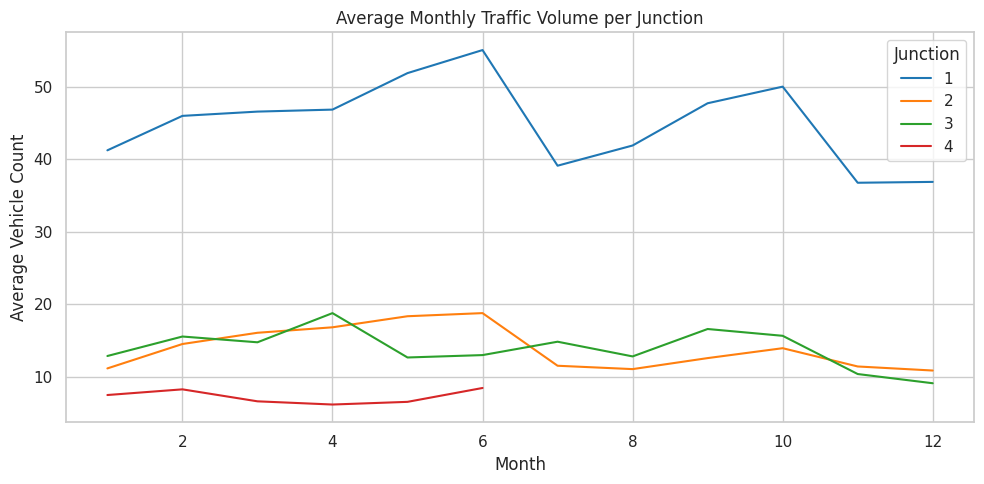

In [28]:
plt.figure(figsize=(10, 5))
monthly_mean = train_df.groupby(['Month', 'Junction'])['Vehicles'].mean().reset_index()
sns.lineplot(data=monthly_mean, x='Month', y='Vehicles', hue='Junction', palette='tab10')
plt.title("Average Monthly Traffic Volume per Junction")
plt.xlabel("Month")
plt.ylabel("Average Vehicle Count")
plt.tight_layout()
plt.show()


**Plot 5: Weekend vs Weekday Distribution**

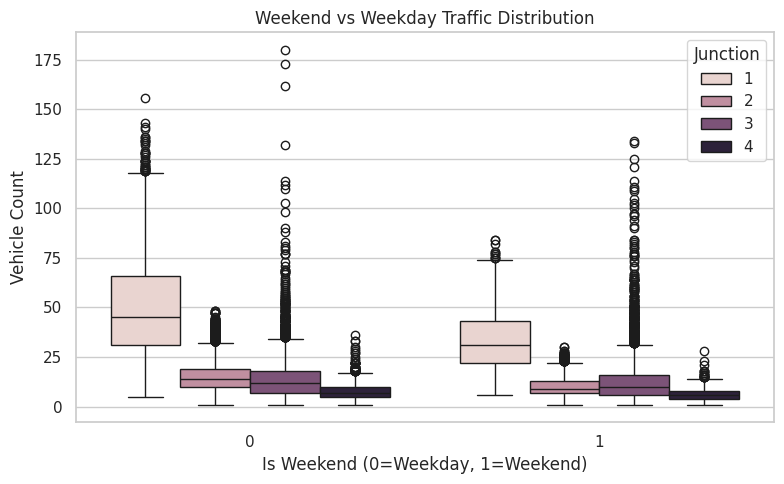

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=train_df, x='Is_Weekend', y='Vehicles', hue='Junction')
plt.title("Weekend vs Weekday Traffic Distribution")
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)")
plt.ylabel("Vehicle Count")
plt.legend(title="Junction")
plt.tight_layout()
plt.show()

# **4. Modeling**

In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb


**For modeling, we select features that are not raw DateTime/text identifiers.**

In [29]:
features = ['Junction', 'Hour', 'Day', 'Weekday', 'Month', 'Year',
            'Is_Weekend', 'Is_Night', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos']
target = 'Vehicles'

**Prepare train data**

In [30]:
X = train_df[features]
y = train_df[target]

In [75]:
X['Junction'] = X['Junction'].astype('category')
if 'Junction' in test_df.columns:
    test_df['Junction'] = test_df['Junction'].astype('category')

**Split into training and validation sets (e.g., 80/20 split)**

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

**1) LightGBM**

**Set parameters for LightGBM regression and Train the model with early stopping**

In [79]:
# Junction' is categorical
X_train['Junction'] = X_train['Junction'].astype('category')
X_valid['Junction'] = X_valid['Junction'].astype('category')

# Initialize LightGBM Regressor
model = LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    num_leaves=31,
    n_estimators=1500,
    random_state=42
)

# Train with both train and valid sets included in eval_set
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_metric='rmse',
    callbacks=[
        lgb.early_stopping(50),
        lgb.log_evaluation(period=1)  # Logs train & valid RMSE every round
    ]
)

[1]	training's rmse: 19.9669	training's l2: 398.679	valid_1's rmse: 19.3092	valid_1's l2: 372.843
Training until validation scores don't improve for 50 rounds
[2]	training's rmse: 19.0984	training's l2: 364.749	valid_1's rmse: 18.4742	valid_1's l2: 341.298
[3]	training's rmse: 18.2783	training's l2: 334.097	valid_1's rmse: 17.6881	valid_1's l2: 312.868
[4]	training's rmse: 17.505	training's l2: 306.425	valid_1's rmse: 16.9447	valid_1's l2: 287.125
[5]	training's rmse: 16.7752	training's l2: 281.409	valid_1's rmse: 16.2438	valid_1's l2: 263.86
[6]	training's rmse: 16.0879	training's l2: 258.819	valid_1's rmse: 15.5833	valid_1's l2: 242.838
[7]	training's rmse: 15.4393	training's l2: 238.372	valid_1's rmse: 14.9588	valid_1's l2: 223.765
[8]	training's rmse: 14.8284	training's l2: 219.881	valid_1's rmse: 14.3719	valid_1's l2: 206.553
[9]	training's rmse: 14.2529	training's l2: 203.146	valid_1's rmse: 13.8201	valid_1's l2: 190.994
[10]	training's rmse: 13.7139	training's l2: 188.07	valid_1

LGBMRegressor(learning_rate=0.05, n_estimators=1500, objective='regression',
              random_state=42)

**2) XGBoost Regressor**

In [56]:
import xgboost as xgb

# Convert to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Define parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': 6,
    'seed': 42
}

# Train using xgb.train (core API)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=100
)



[0]	train-rmse:19.96466	valid-rmse:19.30695
[100]	train-rmse:5.32386	valid-rmse:5.26304
[200]	train-rmse:4.84136	valid-rmse:4.85685
[300]	train-rmse:4.50438	valid-rmse:4.63600
[400]	train-rmse:4.27305	valid-rmse:4.49153
[500]	train-rmse:4.12364	valid-rmse:4.41161
[600]	train-rmse:3.99459	valid-rmse:4.34127
[700]	train-rmse:3.87140	valid-rmse:4.28224
[800]	train-rmse:3.76975	valid-rmse:4.23920
[900]	train-rmse:3.68992	valid-rmse:4.21087
[999]	train-rmse:3.61820	valid-rmse:4.17212


LightGbm is the best model

**Predict on validation set and evaluate**

In [87]:
y_pred = model.predict(X_valid, num_iteration=model.best_iteration_) # model=lightgbm
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)
print(f"\nValidation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R²   : {r2:.2f}")


Validation MAE: 2.40
Validation RMSE: 3.84
Validation R²   : 0.96


# **5. Test Prediction**

**Prepare test features (ensure same processing as train)**

In [70]:
X_test = test_df[features]
X_test['Junction'] = X_test['Junction'].astype('category')

**Predict on test data using the best iteration from training**

In [80]:
test_df['Vehicles'] = model.predict(X_test, num_iteration=model.best_iteration_)


In [81]:
# If the test file requires a specific submission format, adjust accordingly.
# For example, if a submission file requires 'ID' and predicted 'Vehicles':
if 'ID' in test_df.columns:
    submission = test_df[['ID', 'Vehicles']]
else:
    # Otherwise, create an index-based submission
    submission = test_df.copy()

**Saving submission file**

In [82]:
submission.to_csv("submission.csv", index=False)
print("\nSubmission file saved as 'submission.csv'.")


Submission file saved as 'submission.csv'.
